<b>Lets's start. Just a test.</b>

In [3]:
!py sdvtest3.py

                     name  tables     rows  columns
0                UTube_v1       2     2735       10
1                  SAP_v1       4  3841029       71
2                 NCAA_v1       9   202305      333
3       airbnb-simplified       2  5751408       22
4      Atherosclerosis_v1       4    12781      307
5                rossmann       3  2035533       21
6                 walmart       4   544869       24
7   AustralianFootball_v1       4   139179      193
8           Pyrimidine_v1       2      296       38
9                world_v1       3     5302       39
10           Accidents_v1       3  1463093       87
11              trains_v1       2       83       15
12           legalActs_v1       5  1754397       50
13                 DCG_v1       2     8258        9
14            imdb_ijs_v1       7  5647694       50
15             SalesDB_v1       4  6735507       35
16           MuskSmall_v1       2      568      173
17                 KRK_v1       1     1000        9
18          

https://www.mltechniques.com

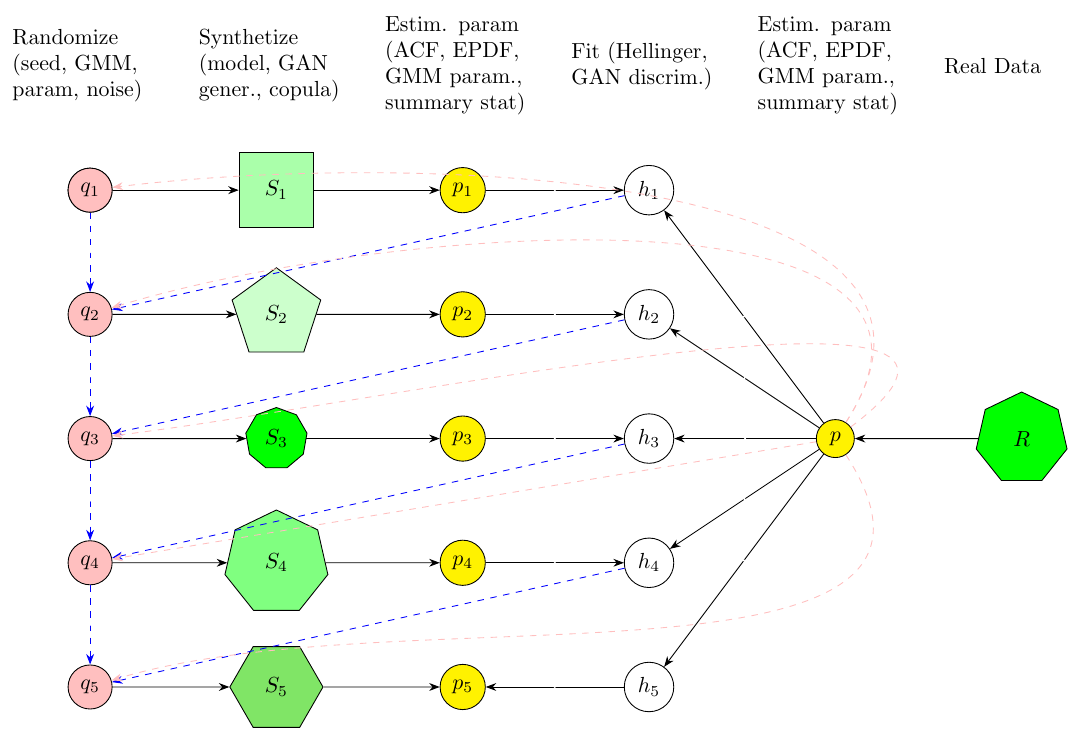

In [2]:
import csv 
from scipy.stats import norm
import numpy as np

filename = 'circle8d.csv' # make sure fields don't contain commas

with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    fields = next(reader) # Reads header row as a list
    rows = list(reader)   # Reads all subsequent rows as a list of lists

#-- group by (Outcome)

groupCount = {}
groupList = {}
for obs in rows:
    group = 0  # no grouping 
    # obs[0] is clientID and is ignored
    if group in groupCount:
        cnt = groupCount[group]
        groupList[(group,cnt)]=(obs[0],obs[1],obs[2],obs[3],obs[4],obs[5],obs[6],obs[7],obs[8]) 
        groupCount[group] += 1    
    else:
        groupList[(group,0)]=(obs[0],obs[1],obs[2],obs[3],obs[4],obs[5],obs[6],obs[7],obs[8]) 
        groupCount[group] = 1

#-- generate synthetic data customized to each group (Gaussian copula)

seed = 453
np.random.seed(seed)

OUT=open("circle8d_copula_synth.txt","w")
line=("ID\tX1\tX2\tX3\tX4\tX5\tX6\tX7\tX8\tOutcome\n")
OUT.write(line)

for group in groupCount:
    nobs = groupCount[group]
    X1 = []
    X2 = []
    X3 = []
    X4 = []
    X5 = []
    X6 = []
    X7 = []
    X8 = []
    X9 = []
    for cnt in range(nobs):
        features = groupList[(group,cnt)]
        X1.append(float(features[0]))       
        X2.append(float(features[1]))       
        X3.append(float(features[2]))  
        X4.append(float(features[3]))   
        X5.append(float(features[4]))
        X6.append(float(features[5]))
        X7.append(float(features[6]))
        X8.append(float(features[7]))
        X9.append(float(features[8]))
    mu  = [np.mean(X1), np.mean(X2), np.mean(X3), np.mean(X4), np.mean(X5), np.mean(X6), np.mean(X7), np.mean(X8),np.mean(X1)] 
    zero = [0, 0, 0, 0, 0, 0, 0, 0, 0] 
    z = np.stack((X1, X2, X3, X4, X5, X6, X7, X8, X9), axis = 0)
    # cov = np.cov(z)
    corr = np.corrcoef(z) # correlation matrix for Gaussian copula for this group

    print("------------------")
    print("\n\nGroup: ",group,"[",cnt,"obs ]\n") 
    print("means for X1 to X8: %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f %.2f\n" 
           % (mu[0],mu[1],mu[2],mu[3],mu[4],mu[5],mu[6],mu[7],mu[8]))  
    print("correlation matrix:\n")
    print(np.corrcoef(z),"\n")
    nobs_synth = nobs  # number of synthetic obs to create for this group
    gfg = np.random.multivariate_normal(zero, corr, nobs_synth) 
    g_X1 = gfg[:,0]
    g_X2 = gfg[:,1]
    g_X3 = gfg[:,2]
    g_X4 = gfg[:,3]
    g_X5 = gfg[:,4]
    g_X6 = gfg[:,5]
    g_X7 = gfg[:,6]
    g_X8 = gfg[:,7]
    g_X9 = gfg[:,8]

    # generate nobs_synth observations for this group
    print("synthetic observations:\n")

    for k in range(nobs_synth): 
  
        u_X1 = norm.cdf(g_X1[k])
        u_X2 = norm.cdf(g_X2[k])
        u_X3 = norm.cdf(g_X3[k])
        u_X4 = norm.cdf(g_X4[k])
        u_X5 = norm.cdf(g_X5[k])
        u_X6 = norm.cdf(g_X6[k])
        u_X7 = norm.cdf(g_X7[k])
        u_X8 = norm.cdf(g_X8[k])
        u_X9 = norm.cdf(g_X9[k])

        s_X1 = np.quantile(X1, u_X1)  # synthesized X1
        s_X2 = np.quantile(X2, u_X2)  # synthesized X2
        s_X3 = np.quantile(X3, u_X3)  # synthesized X3
        s_X4 = np.quantile(X4, u_X4)  # synthesized X4
        s_X5 = np.quantile(X5, u_X5)  # synthesized X5
        s_X6 = np.quantile(X6, u_X6)  # synthesized X6
        s_X7 = np.quantile(X7, u_X7)  # synthesized X7
        s_X8 = np.quantile(X8, u_X8)  # synthesized X8
        s_X9 = np.quantile(X9, u_X9)  # synthesized X9

        line = str(k)+"\t"+str(s_X1)+"\t"+str(s_X2)+"\t"+str(s_X3)+"\t"+str(s_X4)+"\t"
        line = line + str(s_X5)+"\t"+str(s_X6)+"\t"+str(s_X7)+"\t"+str(s_X8)+"\t"+str(s_X9)+"\n"
        OUT.write(line)
        print("%3d %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f" 
             %(k, s_X1, s_X2, s_X3, s_X4, s_X5, s_X6, s_X7, s_X8, s_X9))
OUT.close()


------------------


Group:  0 [ 399 obs ]

means for X1 to X8: 0.04 -0.01 0.04 -0.01 -0.11 0.01 -0.11 0.01 0.04

correlation matrix:

[[ 1.00000000e+00  6.40800789e-02  1.00000000e+00  6.40800789e-02
  -2.78278981e-02  2.72393263e-02 -2.78278981e-02  2.72393263e-02
   6.62441648e-02]
 [ 6.40800789e-02  1.00000000e+00  6.40800789e-02  1.00000000e+00
   8.28854173e-03 -1.62663789e-01  8.28854173e-03 -1.62663789e-01
  -1.02173706e-02]
 [ 1.00000000e+00  6.40800789e-02  1.00000000e+00  6.40800789e-02
  -2.78278981e-02  2.72393263e-02 -2.78278981e-02  2.72393263e-02
   6.62441648e-02]
 [ 6.40800789e-02  1.00000000e+00  6.40800789e-02  1.00000000e+00
   8.28854173e-03 -1.62663789e-01  8.28854173e-03 -1.62663789e-01
  -1.02173706e-02]
 [-2.78278981e-02  8.28854173e-03 -2.78278981e-02  8.28854173e-03
   1.00000000e+00  5.33395637e-02  1.00000000e+00  5.33395637e-02
  -7.07866863e-02]
 [ 2.72393263e-02 -1.62663789e-01  2.72393263e-02 -1.62663789e-01
   5.33395637e-02  1.00000000e+00  5.3339563

122  0.74  1.82  0.74  1.82 -0.50 -0.50 -0.50 -0.50  0.00
123 -1.00  1.10 -1.00  1.10 -1.42 -0.52 -1.42 -0.52  0.00
124  0.95  0.61  0.95  0.61  0.92  0.95  0.92  0.95  0.00
125 -0.69 -0.76 -0.69 -0.76 -0.32  1.00 -0.32  1.00  1.00
126  1.89  1.00  1.89  1.00 -1.32  1.36 -1.32  1.36  1.00
127  0.84  0.52  0.84  0.52 -0.54  0.09 -0.54  0.09  1.00
128  0.76 -0.81  0.76 -0.81  0.70  1.48  0.70  1.48  0.00
129 -1.00 -0.29 -1.00 -0.29 -1.81 -0.44 -1.81 -0.44  1.00
130  0.13  0.89  0.13  0.89 -0.98 -0.63 -0.98 -0.63  0.00
131  1.52  2.00  1.52  2.00 -1.42 -0.70 -1.42 -0.70  1.00
132  0.85  1.44  0.85  1.44 -1.00 -0.15 -1.00 -0.15  0.00
133 -0.61 -1.90 -0.61 -1.90  1.77 -0.63  1.77 -0.63  1.00
134 -0.17  1.16 -0.17  1.16 -1.32 -1.98 -1.32 -1.98  1.00
135 -0.68 -0.80 -0.68 -0.80  0.94  0.06  0.94  0.06  1.00
136 -1.10 -1.64 -1.10 -1.64  0.98  1.38  0.98  1.38  0.00
137  0.51 -0.48  0.51 -0.48  0.38  0.68  0.38  0.68  0.00
138 -1.96 -1.90 -1.96 -1.90  0.71 -0.81  0.71 -0.81  0.00
139 -0.51 -0.8

376 -1.92 -1.27 -1.92 -1.27  1.78 -0.27  1.78 -0.27  0.00
377  0.98  0.28  0.98  0.28  0.65 -0.98  0.65 -0.98  0.00
378 -1.51 -0.44 -1.51 -0.44  1.38  1.98  1.38  1.98  0.00
379  0.82  0.81  0.82  0.81  0.90  0.04  0.90  0.04  0.00
380 -0.98 -1.00 -0.98 -1.00  0.69  0.94  0.69  0.94  0.00
381  1.64 -1.75  1.64 -1.75  0.49  0.09  0.49  0.09  0.00
382  0.52 -0.41  0.52 -0.41  0.02  0.87  0.02  0.87  0.00
383  0.04  2.00  0.04  2.00  0.83 -0.35  0.83 -0.35  0.00
384 -1.99 -0.69 -1.99 -0.69 -0.02 -0.75 -0.02 -0.75  0.00
385 -0.28  1.25 -0.28  1.25  0.98  0.72  0.98  0.72  1.00
386 -0.17  0.61 -0.17  0.61  1.21 -0.45  1.21 -0.45  1.00
387 -1.09 -0.94 -1.09 -0.94  1.26  1.00  1.26  1.00  0.00
388  0.49  1.86  0.49  1.86 -0.18 -1.26 -0.18 -1.26  0.00
389  1.69  0.87  1.69  0.87 -1.19 -1.45 -1.19 -1.45  0.00
390  0.85 -0.13  0.85 -0.13 -0.77 -0.04 -0.77 -0.04  1.00
391 -0.92  0.52 -0.92  0.52  1.77 -0.69  1.77 -0.69  1.00
392  1.55 -0.61  1.55 -0.61  0.31 -1.93  0.31 -1.93  1.00
393 -1.40  1.3